# About dataset

https://www.kaggle.com/datasets/mirichoi0218/insurance

<img src="../regression\about_dataset.png">

In [1]:
import pandas as pd
import numpy as np
import pylab
from scipy.stats import skewtest, boxcox, probplot, normaltest
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [ ]:
df = pd.read_csv("../regression\insurance.csv")

# EDA

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
# Spliting categorical and numerical data
categorical = [i for i in df.columns if df[i].dtype == 'O' or i == 'children']
numerical = df.drop(columns = categorical, axis = 1).columns.to_list() # numerical1 = df.select_dtypes("number").columns.to_list()
print(categorical, numerical)

## Ploting data

In [ ]:
# Ploting categorical data
for i in categorical:
    sns.countplot(data = df, x = i)
    plt.show()

In [ ]:
# Relation between  numerical feature and target
for i in df.iloc[:,:6].columns.to_list():
    sns.relplot(x = df[i], y = df['charges'], kind = 'scatter')
    plt.show()

In [ ]:
# Checando proximidade das colunas numéricas com uma distribuição normal
for i in numerical:
    print(f"Coluna: {i}\nSkew: {df[i].skew()}\n{normaltest(df[i])}")
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data = df, x = i, kde = True)
    plt.subplot(1, 2, 2)
    probplot(df[i], dist= 'norm', plot = pylab)
    plt.show()

## Gaussian transformation

In [ ]:
df['age_log'] = np.log(df['age'])

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

sns.histplot(ax =axes[0, 0] , data = df, x = 'age', kde = True)

probplot(plot = axes[1, 0], x = df['age'], dist= 'norm')
axes[1, 0].set_title("")

sns.histplot(ax =axes[0, 1], data = df, x = 'age_log', kde = True)

probplot(plot = axes[1, 1], x = df['age_log'], dist= 'norm')
axes[1, 1].set_title("")

plt.show()

### Funcao transformacao

In [48]:
def plot(column):
    fig, axes = plt.subplots(1, 2, figsize = (8, 5))
    sns.histplot(ax = axes[0], data = column, kde = True)

    probplot(plot = axes[1], x = column)
    axes[1].set_title("")
    return plt.show()

In [49]:
def switch(column):
    print('log')
    log = column.apply(np.log)
    plot(log)

    print('exp')
    exp = column.apply(lambda x: x**2)
    plot(exp)

    print('reciprocal')
    reciprocal = column.apply(lambda x: 1/x)
    plot(reciprocal)

    print('sqrt')
    sqrt = np.sqrt(column)
    plot(sqrt)
    return

log


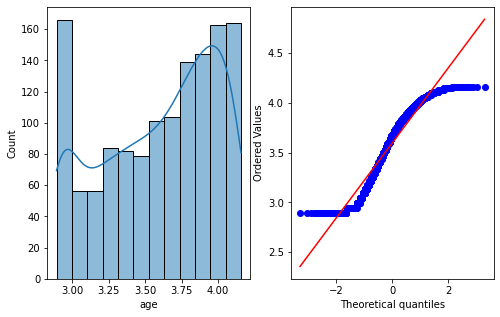

exp


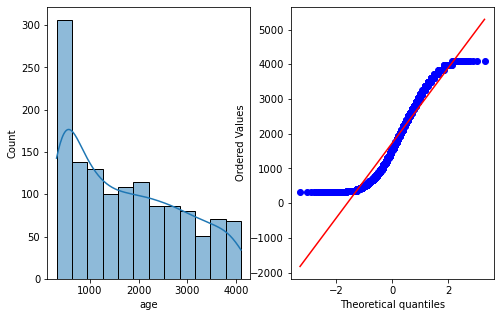

reciprocal


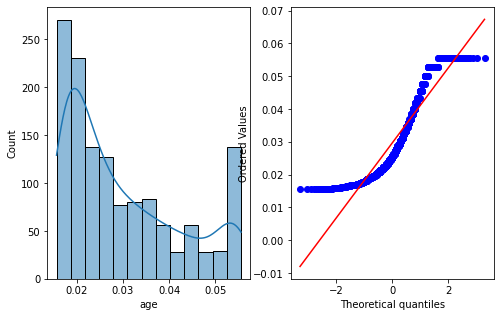

sqrt


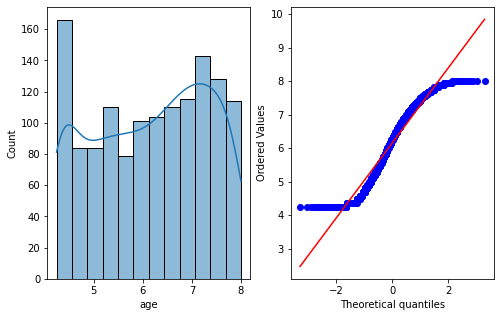

In [50]:
switch(df['age'])

# Preprocessing